In [5]:
models <- c('m1','m11','m2','m3')

SF=ZN <- list()
for(i in 1:length(models)){
    SF[[i]] <- read.csv(paste('fit',models[i],'seaflow.csv',sep='_'))
    ZN[[i]] <- read.csv(paste('fit',models[i],'zinser.csv',sep='_'))
}

In [10]:
pars <- c('gamma_max','respiration','E_star','w_ini_mu','w_ini_sigma','divrate')

PARS_sf=PARS_zn   <- array(NA,dim=c(nrow(zn),length(pars),length(models)))
#colnames(pars_sf)=colnames(pars_zn) <- pars
for(j in 1:length(models)){
    pars_sf=pars_zn                     <- matrix(NA,nrow(zn),length(pars))
    colnames(pars_sf)=colnames(pars_zn) <- pars
    for(i in 1:length(pars)){
        pars_sf[,i] <- SF[[j]][,grep(pars[i],colnames(SF[[j]]))]
        pars_zn[,i] <- ZN[[j]][,grep(pars[i],colnames(ZN[[j]]))]
    }
    PARS_sf[,,j] <- pars_sf
    PARS_zn[,,j] <- pars_zn
}


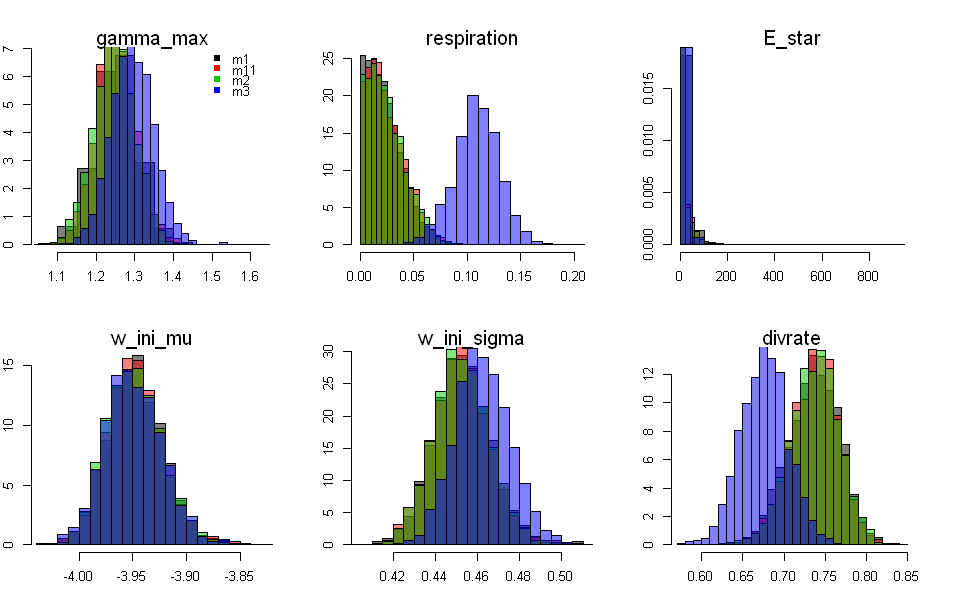

In [23]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,3),mar=c(3,2,3,3))
for(i in 1:length(pars)){
    hist(PARS_sf[,i,1],main='',breaks=20,xlab='',freq=FALSE,xlim=range(c(PARS_sf[,i,])),col=adjustcolor('black',alpha.f=0.5))
    for(j in 2:length(models)){
        hist(PARS_sf[,i,j],main='',,breaks=20,xlab='',freq=FALSE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
    }
    mtext(pars[i])
    if(i==1)
        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
}


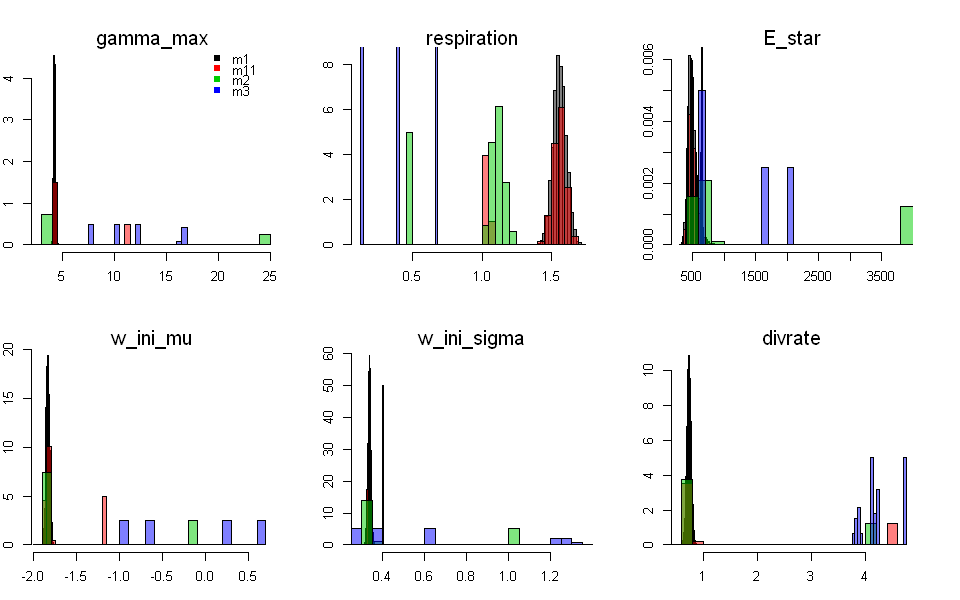

In [24]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,3),mar=c(3,2,3,3))
for(i in 1:length(pars)){
    hist(PARS_zn[,i,1],main='',breaks=20,xlab='',freq=FALSE,xlim=range(c(PARS_zn[,i,])),col=adjustcolor('black',alpha.f=0.5))
    for(j in 2:length(models)){
        hist(PARS_zn[,i,j],main='',,breaks=20,xlab='',freq=FALSE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
    }
    mtext(pars[i])
    if(i==1)
        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
}